#### optional: check if correct kernel is used

In [ ]:
import sys
print(sys.executable)
# should be in my case psi4_310/bin/python

## Imports....

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw
from rdkit.Chem import rdMolTransforms

import psi4

## Initialize the molecule

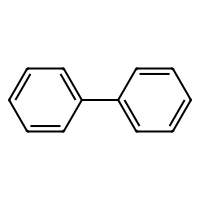

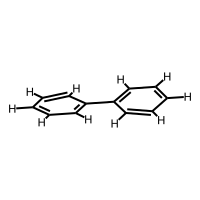

In [8]:
smiles = "c1ccccc1-c2ccccc2"
rdkit_mol = Chem.MolFromSmiles(smiles)
display(Draw.MolToImage(rdkit_mol, size=(200, 200)))
rdkit_mol = Chem.AddHs(rdkit_mol)
AllChem.EmbedMolecule(rdkit_mol)
AllChem.MMFFOptimizeMolecule(rdkit_mol)
display(Draw.MolToImage(rdkit_mol, size=(200, 200)))

### confirm we are choosing correct atoms for the rotation by drawing it:

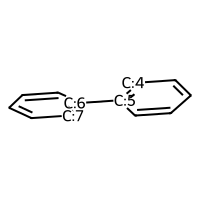

In [9]:
enum_mol = Chem.Mol(rdkit_mol)
for atom in enum_mol.GetAtoms():
    if atom.GetIdx() in [4, 5, 6, 7]:
        atom.SetAtomMapNum(atom.GetIdx())
enum_mol = Chem.RemoveHs(enum_mol)
display(Draw.MolToImage(enum_mol, size=(200, 200)))

## Create rotatation 

In [10]:
angle_step = 45 # degree
num_angles = int(360 / angle_step) # since we start at 0 it should be thus from 0 to 315 at 45 degrees

torsion_atoms = [4, 5, 6, 7]  # Indices of the atoms forming the torsion

conformations = []  # List to store all conformations

for angle in range(num_angles):
    theta = angle * angle_step
    print(theta)
    mol2 = Chem.Mol(rdkit_mol)  # Create a copy of the molecule
    conf = mol2.GetConformer()
    rdMolTransforms.SetDihedralDeg(conf, *torsion_atoms, theta)
    conformations.append(mol2)  # Append the conformation to the list

0
45
90
135
180
225
270
315


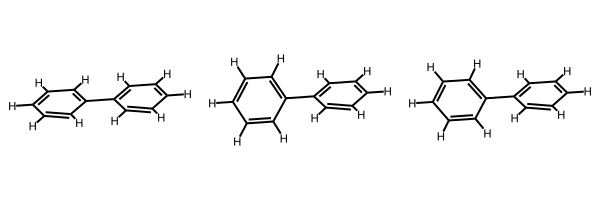

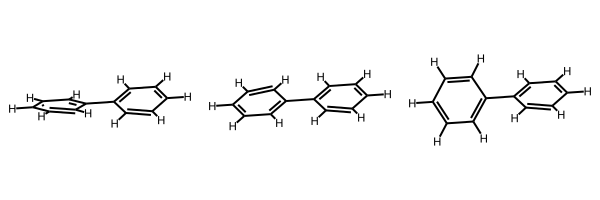

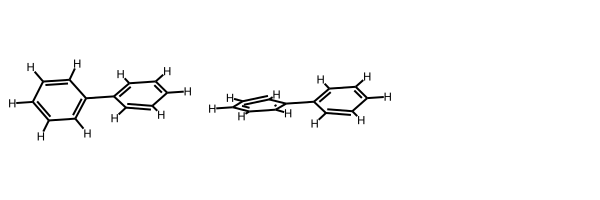

In [11]:
# Draw conformations as a check
for i in range(0, len(conformations), 3):
    display(Draw.MolsToGridImage(conformations[i:i+3], molsPerRow=3, subImgSize=(200,200)))

### Finally calculate energy of the conformers

In [12]:
psi4.set_options({"basis": "6-31G", "scf_type": "pk", "reference": "uhf"})
psi4.core.set_num_threads(8)


  Threads set to 8 by Python driver.


In [ ]:
molecule_list = []
energy_list = []
for mol_rot in conformations:
    xyz = Chem.MolToXYZBlock(mol_rot)
    molecule = psi4.geometry(xyz)
    energy = psi4.energy("B3LYP")
    energy_list.append(energy)
    molecule_list.append(molecule)

### Results

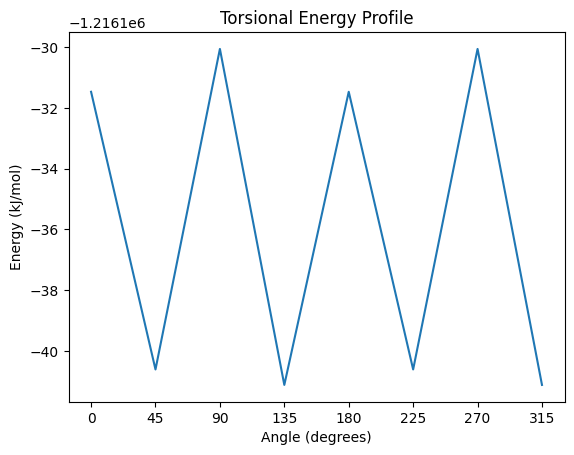

In [14]:
# Convert energy list to kJ/mol and plot
energy_list_kJ = [energy * psi4.constants.hartree2kJmol for energy in energy_list]

angles = [angle for angle in range(0, 360, 360//num_angles)]

plt.plot(angles, energy_list_kJ)
plt.xlabel("Angle (degrees)")
plt.ylabel("Energy (kJ/mol)")
plt.title("Torsional Energy Profile")
plt.xticks(angles)
plt.show()

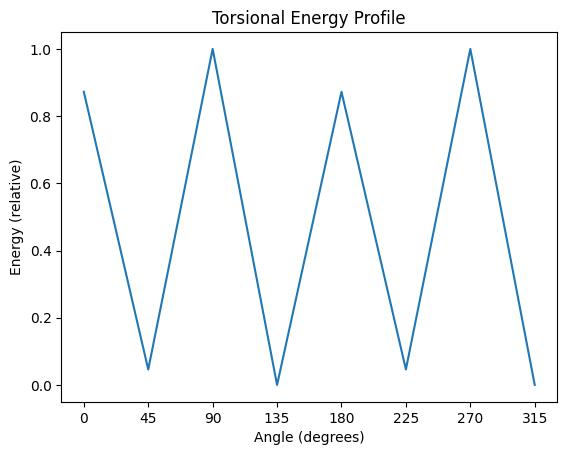

In [15]:
# plot as relative energies
min_val = min(energy_list_kJ)
max_val = max(energy_list_kJ)

normalized_list = [(x - min_val) / (max_val - min_val) * 1 for x in energy_list_kJ]

plt.plot(angles, normalized_list)
plt.xlabel("Angle (degrees)")
plt.ylabel("Energy (relative)")
plt.title("Torsional Energy Profile")
plt.xticks(angles)
plt.show()